Loaded package PyDDE


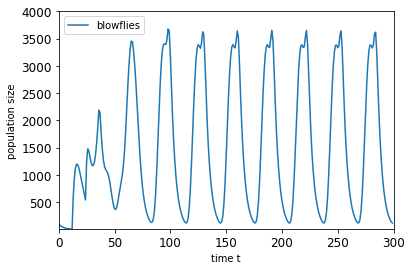

In [3]:
import math
%matplotlib inline
from scipy import *
from numpy import *
import PyDDE.pydde as p
import matplotlib.pyplot as plt

#DDE example from Solv95 distribution.

#This model is a model for Nicholson's (1954) blowflies, as given by Gurney and Nisbet (1981)


dde_eg = p.dde()

def ddegrad(s, c, t):
    alag = 0.0
    if (t>c[0]):
        alag = p.pastvalue(0,t-c[0],0)
    return array( [ c[2]*alag*exp(-alag/c[3])-c[1]*s[0] ] )

def ddesthist(g, s, c, t):
    return (s, g)

ddecons = array([12.0,0.25,10.0,300.0,100.0])
ddeist = array([ddecons[4]])
ddestsc = array([0])

# Short version
dde_eg.dde(y=ddeist, times=arange(0.0, 300.0, 1.0),
           func=ddegrad, parms=ddecons,
           tol=0.000005, dt=1.0, hbsize=1000, nlag=1, ssc=ddestsc)

#dde_eg.initproblem(no_vars=1, no_cons=5, nhv=1, nlag=1, nsw=0, no_otimes=301, t0=0.0, t1=300.0, initstate=ddeist, c=ddecons, otimes= arange(0.0, 300.0, 1.0), grad=ddegrad, storehistory=ddesthist)


# print(dde_eg.data)

plt.plot(dde_eg.data[:, 0], dde_eg.data[:, 1],  label=r'blowflies')
plt.legend()
plt.xlabel('time t')
plt.ylabel('population size')
#plt.yscale('log')
plt.axis([0,300,10,4000])
plt.tick_params(
    axis='both', # changes apply to both axis
    labelsize=12) # set new font size
